In [31]:
data = [
  [1932, 1928, -0.017763, 50.8663, -0.017763],
  [2355, 2259, -0.426371, 60.8024, -0.426371],
  [2033, 1938, -0.42193, 52.3291, -0.42193],
  [2310, 2194, -0.515198, 59.3528, -0.515198],
  [2039, 1940, -0.439696, 52.4345, -0.439696],
  [2387, 2263, -0.55073, 61.2768, -0.55073],
  [2044, 1943, -0.44858, 52.5399, -0.44858],
  [2387, 2263, -0.55073, 61.2768, -0.55073],
  [2045, 1945, -0.444136, 52.5795, -0.444136],
  [2321, 2204, -0.519642, 59.6296, -0.519642],
  [2051, 1947, -0.461902, 52.6849, -0.461902],
  [2393, 2269, -0.55073, 61.4349, -0.55073],
  [2050, 1950, -0.444136, 52.7112, -0.444136],
  [2389, 2276, -0.501874, 61.4745, -0.501874],
  [2049, 1955, -0.417489, 52.7639, -0.417489],
  [2394, 2276, -0.524083, 61.5404, -0.524083],
  [2054, 1958, -0.426371, 52.8694, -0.426371],
  [2399, 2279, -0.532964, 61.6458, -0.532964],
  [2058, 1956, -0.45302, 52.8957, -0.45302],
  [2401, 2278, -0.546289, 61.6589, -0.546289],
  [2058, 1956, -0.45302, 52.8957, -0.45302],
  [2339, 2221, -0.52408, 60.0908, -0.52408],
  [2462, 2336, -0.559609, 63.2271, -0.559609],
  [2331, 1953, -1.67884, 56.4537, -1.67884],
  [2059, 2218, 0.706179, 56.3615, 0.706179],
  [2407, 2278, -0.572939, 61.738, -0.572939],
  [2327, 2207, -0.532964, 59.7482, -0.532964],
  [2058, 1956, -0.45302, 52.8957, -0.45302],
  [2403, 2283, -0.532964, 61.7512, -0.532964],
  [2061, 1960, -0.44858, 52.988, -0.44858],
  [2410, 2276, -0.595142, 61.7512, -0.595142],
  [2413, 1952, -2.04747, 57.5211, -2.04747],
  [2067, 2286, 0.97266, 57.363, 0.97266],
]

In [32]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
data = np.array(data)

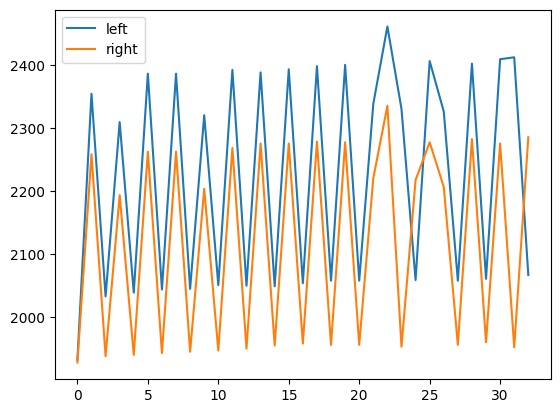

In [34]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(data)), data[:, :2])
ax.legend(["left", "right"])

So what does this show me - that the left side is moving consistently faster than the right. That the peaks and troughs are likely to be timing discrepancies. Note there are some points later where left and right cross each other though.
This will be why it thinks it drives in circles. In reality, it is not driving in that much of a circle.

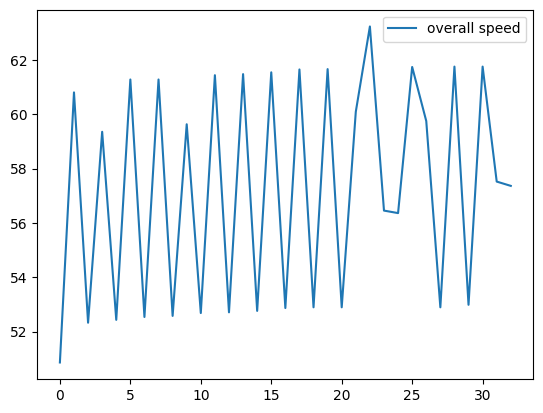

In [35]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(data)), data[:, 3])
ax.legend(["overall speed"])

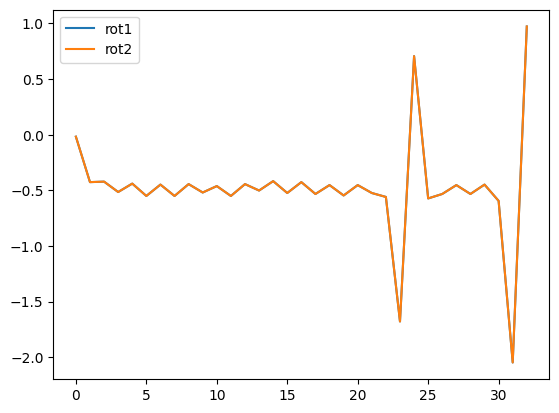

In [36]:
fig, ax = plt.subplots()
rot1 = ax.plot(np.arange(len(data)), data[:, 2])
rot2 = ax.plot(np.arange(len(data)), data[:, 4])
ax.legend(["rot1", "rot2"])

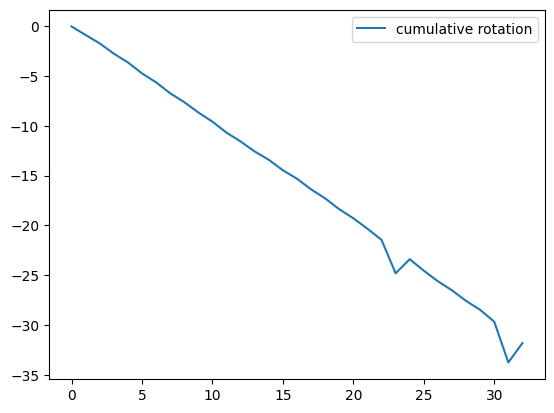

In [37]:
cumulative_rotation = np.cumsum(data[:, 4]) + np.cumsum(data[:, 2])
fig, ax = plt.subplots()
ax.plot(np.arange(len(data)), cumulative_rotation)
ax.legend(["cumulative rotation"])

-35? That is not enough for a little circle. It is clearly pulling to the left though. 

Is this down to how I'm adding stuff in? The next data I should collect is one pose, following it's path. Let's see how that changes over time.

In [67]:
# x, y, theta, left, right, rot1, trans, rot2
new_data = np.array([
  (1150.09, 192.206, 66.9911, 9, 8, -0.00444137, 0.224023, -0.00444137),
  (1172.14, 244.418, 67.2132, 2138, 2163, 0.111037, 56.6778, 0.111037),
  (1192.47, 292.049, 66.5559, 2002, 1928, -0.328659, 51.7888, -0.328659),
  (1217.07, 347.724, 65.7653, 2354, 2265, -0.395283, 60.8683, -0.395283),
  (1238.91, 395.394, 65.0103, 2032, 1947, -0.377517, 52.4345, -0.377517),
  (1266.02, 452.31, 64.0509, 2446, 2338, -0.479665, 63.0426, -0.479665),
  (1289.42, 499.497, 63.1893, 2047, 1950, -0.430812, 52.6717, -0.430812),
  (1318.48, 555.725, 62.15, 2460, 2343, -0.519639, 63.293, -0.519639),
  (1343.51, 602.222, 61.2706, 2053, 1954, -0.439696, 52.8035, -0.439696),
  (1374.49, 657.551, 60.2402, 2464, 2348, -0.515201, 63.4116, -0.515201),
  (1401.1, 703.261, 59.3341, 2058, 1956, -0.45302, 52.8957, -0.45302),
  (1434.11, 757.778, 58.286, 2477, 2359, -0.524083, 63.7279, -0.524083),
  (1467.93, 811.4, 57.2289, 2465, 2346, -0.528521, 63.3984, -0.528521),
  (1497.94, 857.197, 56.2962, 2130, 2025, -0.466345, 54.7538, -0.466345),
  (1533.72, 909.792, 55.2569, 2472, 2355, -0.519642, 63.6093, -0.519642),
  (1564.36, 953.251, 54.3775, 2067, 1968, -0.439696, 53.1725, -0.439696),
  (1602.09, 1004.88, 53.3027, 2487, 2366, -0.537405, 63.9519, -0.537405),
  (1640.58, 1055.54, 52.2368, 2474, 2354, -0.532964, 63.6224, -0.532964),
  (1674.6, 1098.74, 51.3219, 2138, 2035, -0.457461, 54.991, -0.457461),
  (1714.96, 1148.2, 50.2559, 2482, 2362, -0.532964, 63.8333, -0.532964),
  (1750.48, 1190.18, 49.2699, 2142, 2031, -0.492992, 54.991, -0.492992),
  (1792.59, 1238.2, 48.2307, 2482, 2365, -0.519639, 63.8729, -0.519639),
  (1829.61, 1278.96, 47.2713, 2143, 2035, -0.47967, 55.0569, -0.47967),
  (1874.64, 1326.7, 46.081, 2557, 2423, -0.59514, 65.6255, -0.59514),
  (1914.43, 1367.25, 45.0062, 2216, 2095, -0.537405, 56.8095, -0.537405),
  (1961.38, 1413.23, 43.7893, 2562, 2425, -0.608464, 65.7177, -0.608464),
])

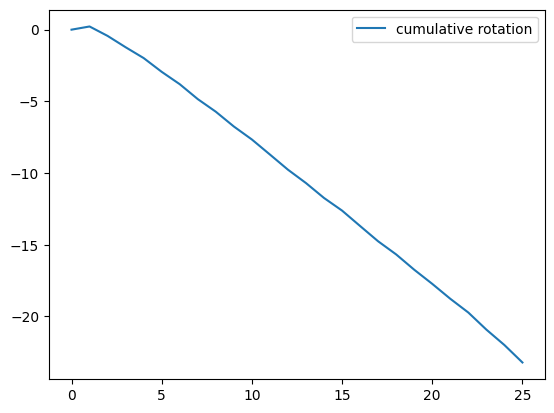

In [70]:
cumulative_rotation = np.cumsum(new_data[:, 5] + new_data[:, 7])
fig, ax = plt.subplots()
ax.plot(np.arange(len(cumulative_rotation)), cumulative_rotation)
ax.legend(["cumulative rotation"])

So - we should graph the change in rotation (rot1 + rot2), vs the change in rotation in the pose. That should give us a better idea of what is going on.

(0.0, 2000.0)

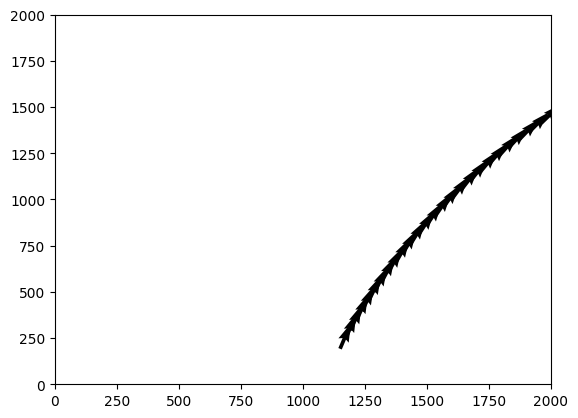

In [39]:
# lets plot the x, y, theta
fig, ax  = plt.subplots()
u, v = np.cos(np.radians(new_data[:, 2])), np.sin(np.radians(new_data[:, 2]))
ax.quiver(new_data[:, 0], new_data[:, 1], u, v)
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2000)

That actually looks coherent. There is roughly an arc, with the headings changing in the same direction. That is good.

This is not the little circles being plotted... What?

In [40]:
poses_raw_data = """
  Received data: {"poses": [[1150, 192], [155, 870], [1413, 665], [112, 620], [738, 209], [518, 344], [661, 1441], [1315, 9], [1077, 998], [1433, 197], [957, 729], [589, 569], [1492, 1089], [1345, 61], [982, 258], [385, 1024], [478, 675], [582, 210], [1359, 686], [922, 937]]}
  Received data: {"poses": [[1172, 244], [103, 894], [1363, 693], [124, 675], [789, 184], [551, 298], [713, 1463], [1293, 62], [1068, 943], [1394, 238], [1010, 748], [540, 540], [1490, 1032], [1292, 82], [1036, 243], [352, 978], [508, 626], [639, 212], [1311, 716], [890, 891]]}
  Received data: {"poses": [[1192, 292], [91, 944], [1312, 698], [77, 697], [801, 133], [597, 274], [669, 1489], [1263, 104], [1105, 906], [1405, 289], [1028, 796], [488, 537], [1537, 1008], [1241, 72], [1061, 197], [382, 935], [560, 621], [687, 232], [1358, 736], [847, 863]]}
  Received data: {"poses": [[1217, 347], [90, 1005], [1268, 656], [64, 756], [764, 85], [654, 252], [608, 1496], [1277, 164], [1161, 883], [1350, 315], [1037, 856], [447, 581], [1550, 949], [1208, 20], [1066, 137], [436, 907], [598, 573], [727, 278], [1306, 767], [786, 859]]}
  Received data: {"poses": [[1238, 395], [90, 1057], [1282, 605], [63, 809], [712, 78], [677, 205], [570, 1460], [1300, 211], [1203, 914], [1339, 367], [1075, 893], [451, 633], [1517, 908], [1229, -28], [1049, 87], [484, 887], [578, 524], [756, 321], [1254, 775], [736, 843]]}
  Received data: {"poses": [[1266, 452], [90, 1120], [1340, 581], [64, 872], [653, 55], [651, 148], [585, 1399], [1328, 267], [1204, 977], [1340, 430], [1138, 884], [464, 695], [1455, 900], [1275, -71], [992, 60], [511, 830], [524, 493], [815, 343], [1207, 732], [688, 803]]}
  Received data: {"poses": [[1289, 499], [90, 1173], [1380, 615], [65, 925], [644, 3], [611, 113], [633, 1378], [1351, 315], [1157, 1002], [1341, 482], [1159, 836], [494, 738], [1406, 881], [1294, -120], [948, 88], [488, 782], [487, 456], [855, 308], [1219, 681], [668, 754]]}
  Received data: {"poses": [[1318, 555], [90, 1236], [1377, 678], [66, 988], [676, -52], [594, 52], [682, 1418], [1377, 372], [1100, 975], [1343, 546], [1174, 775], [558, 741], [1394, 819], [1273, -180], [923, 147], [440, 742], [491, 392], [884, 252], [1277, 654], [669, 691]]}
  Received data: {"poses": [[1343, 602], [90, 1289], [1328, 699], [67, 1041], [700, -99], [634, 17], [681, 1471], [1398, 421], [1098, 922], [1345, 598], [1212, 738], [590, 699], [1419, 773], [1242, -223], [956, 188], [425, 691], [532, 360], [933, 233], [1318, 687], [693, 644]]}
  Received data: {"poses": [[1374, 657], [90, 1352], [1273, 669], [68, 1104], [676, -158], [693, -5], [623, 1497], [1423, 479], [1147, 882], [1347, 662], [1272, 716], [580, 636], [1447, 716], [1246, -286], [1016, 206], [472, 648], [581, 320], [988, 265], [1317, 751], [741, 602]]}
  Received data: {"poses": [[1401, 703], [90, 1405], [1275, 616], [69, 1157], [625, -170], [726, -47], [576, 1472], [1443, 528], [1195, 904], [1349, 715], [1310, 680], [531, 617], [1427, 667], [1294, -310], [1069, 201], [521, 628], [575, 267], [1017, 310], [1269, 773], [791, 586]]}
  Received data: {"poses": [[1434, 757], [90, 1469], [1328, 580], [70, 1221], [563, -187], [711, -109], [578, 1409], [1465, 588], [1210, 966], [1351, 778], [1304, 616], [468, 606], [1364, 654], [1357, -303], [1113, 155], [560, 578], [524, 230], [1070, 344], [1213, 744], [855, 589]]}
  Received data: {"poses": [[1467, 811], [90, 1532], [1383, 610], [71, 1284], [539, -246], [662, -149], [629, 1372], [1487, 648], [1161, 1006], [1353, 842], [1246, 591], [405, 614], [1303, 638], [1419, -313], [1093, 95], [544, 517], [474, 191], [1125, 311], [1213, 681], [912, 616]]}
  Received data: {"poses": [[1497, 857], [90, 1587], [1381, 665], [72, 1339], [569, -291], [644, -201], [678, 1397], [1504, 699], [1111, 984], [1355, 896], [1191, 592], [382, 663], [1281, 588], [1448, -359], [1046, 67], [501, 483], [473, 136], [1145, 260], [1257, 648], [950, 656]]}
  Received data: {"poses": [[1533, 909], [90, 1651], [1327, 700], [73, 1402], [602, -346], [680, -253], [676, 1461], [1523, 760], [1098, 921], [1358, 960], [1136, 560], [405, 723], [1315, 534], [1463, -421], [986, 89], [478, 423], [520, 93], [1192, 217], [1314, 677], [978, 713]]}
  Received data: {"poses": [[1564, 953], [90, 1704], [1282, 672], [74, 1456], [581, -395], [730, -271], [632, 1491], [1539, 811], [1140, 889], [1359, 1013], [1111, 514], [457, 735], [1341, 488], [1504, -455], [970, 140], [508, 379], [559, 56], [1241, 236], [1313, 730], [984, 766]]}
  Received data: {"poses": [[1602, 1004], [90, 1768], [1275, 609], [75, 1520], [522, -419], [773, -318], [576, 1459], [1556, 873], [1202, 906], [1362, 1077], [1063, 471], [509, 699], [1316, 429], [1567, -444], [971, 204], [568, 356], [561, -8], [1282, 285], [1261, 767], [974, 829]]}
  Received data: {"poses": [[1640, 1055], [90, 1832], [1329, 575], [77, 1583], [460, -435], [750, -378], [569, 1396], [1572, 934], [1214, 969], [1364, 1141], [1002, 491], [542, 644], [1256, 407], [1606, -393], [1019, 246], [610, 308], [509, -45], [1342, 306], [1205, 736], [947, 887]]}
  Received data: {"poses": [[1674, 1098], [90, 1887], [1376, 604], [78, 1638], [440, -486], [705, -409], [615, 1365], [1585, 988], [1170, 1002], [1366, 1195], [992, 545], [557, 591], [1203, 394], [1653, -366], [1071, 229], [589, 257], [461, -72], [1381, 267], [1197, 682], [910, 928]]}
  Received data: {"poses": [[1714, 1148], [90, 1950], [1380, 667], [79, 1702], [468, -544], [676, -466], [670, 1398], [1598, 1050], [1109, 982], [1368, 1259], [1003, 608], [519, 540], [1179, 335], [1715, -383], [1113, 181], [536, 221], [444, -133], [1398, 206], [1250, 646], [858, 964]]}
  Received data: {"poses": [[1750, 1190], [90, 2005], [1332, 695], [80, 1757], [495, -592], [710, -510], [674, 1453], [1609, 1104], [1101, 927], [1370, 1314], [986, 661], [464, 543], [1202, 285], [1755, -421], [1098, 128], [511, 173], [479, -176], [1439, 169], [1298, 673], [807, 985]]}
  Received data: {"poses": [[1792, 1238], [90, 2069], [1274, 667], [81, 1821], [475, -652], [767, -537], [619, 1485], [1621, 1167], [1148, 884], [1372, 1378], [941, 706], [424, 594], [1232, 229], [1818, -432], [1042, 96], [548, 121], [524, -222], [1502, 183], [1304, 737], [744, 997]]}
  Received data: {"poses": [[1829, 1278], [90, 2124], [1273, 612], [82, 1876], [422, -666], [801, -581], [569, 1463], [1630, 1221], [1199, 903], [1374, 1433], [917, 756], [445, 644], [1214, 177], [1855, -392], [987, 94], [598, 97], [513, -276], [1540, 222], [1257, 766], [689, 996]]}
  Received data: {"poses": [[1874, 1326], [90, 2190], [1327, 574], [83, 1941], [358, -681], [781, -644], [567, 1397], [1639, 1286], [1216, 967], [1377, 1499], [949, 813], [484, 698], [1150, 162], [1865, -327], [938, 137], [636, 44], [455, -307], [1601, 247], [1197, 740], [624, 985]]}
  Received data: {"poses": [[1914, 1367], [90, 2247], [1376, 602], [84, 1998], [335, -733], [733, -675], [612, 1363], [1646, 1342], [1171, 1002], [1379, 1555], [1006, 811], [528, 734], [1094, 150], [1893, -277], [952, 192], [618, -10], [405, -333], [1642, 209], [1194, 683], [570, 966]]}
  Received data: {"poses": [[1961, 1413], [90, 2312], [1380, 668], [85, 2064], [364, -792], [702, -733], [670, 1395], [1653, 1408], [1109, 982], [1381, 1621], [1065, 783], [592, 719], [1067, 90], [1957, -262], [998, 238], [563, -45], [384, -395], [1657, 145], [1246, 642], [511, 937]]}
"""

In [28]:
import json

The first term looks like the term above. Let's decode parts of it, and plot their path - we don't have the heading info here.

In [47]:
poses_lines = poses_raw_data.split("\n")
poses_lines = [line.replace("Received data: ", "") for line in poses_lines if line]
poses_lines

['  {"poses": [[1150, 192], [155, 870], [1413, 665], [112, 620], [738, 209], [518, 344], [661, 1441], [1315, 9], [1077, 998], [1433, 197], [957, 729], [589, 569], [1492, 1089], [1345, 61], [982, 258], [385, 1024], [478, 675], [582, 210], [1359, 686], [922, 937]]}',
 '  {"poses": [[1172, 244], [103, 894], [1363, 693], [124, 675], [789, 184], [551, 298], [713, 1463], [1293, 62], [1068, 943], [1394, 238], [1010, 748], [540, 540], [1490, 1032], [1292, 82], [1036, 243], [352, 978], [508, 626], [639, 212], [1311, 716], [890, 891]]}',
 '  {"poses": [[1192, 292], [91, 944], [1312, 698], [77, 697], [801, 133], [597, 274], [669, 1489], [1263, 104], [1105, 906], [1405, 289], [1028, 796], [488, 537], [1537, 1008], [1241, 72], [1061, 197], [382, 935], [560, 621], [687, 232], [1358, 736], [847, 863]]}',
 '  {"poses": [[1217, 347], [90, 1005], [1268, 656], [64, 756], [764, 85], [654, 252], [608, 1496], [1277, 164], [1161, 883], [1350, 315], [1037, 856], [447, 581], [1550, 949], [1208, 20], [1066, 137

In [58]:
poses_dicts = [json.loads(line) for line in poses_lines]
poses_over_time = np.array([poses_dict["poses"] for poses_dict in poses_dicts])
# ThreeD array = time, pose number, [x, y]
poses_over_time[0,0]

array([1150,  192])

Lets plot the first pose... We can compare with the arc above.

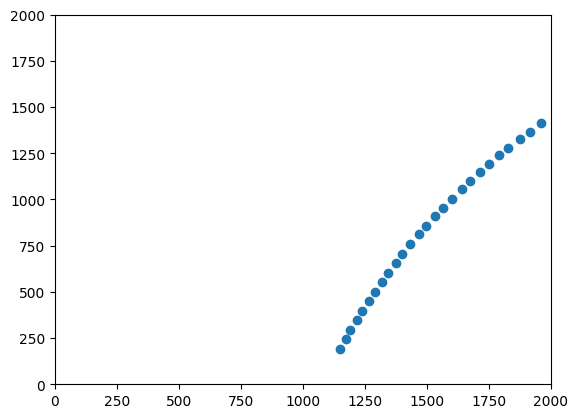

In [61]:
fig, ax = plt.subplots()
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2000)
# The scatter will be the first pose over time.
ax.scatter(poses_over_time[:, 0, 0], poses_over_time[:, 0, 1])


That is a match... Lets try the next pose...

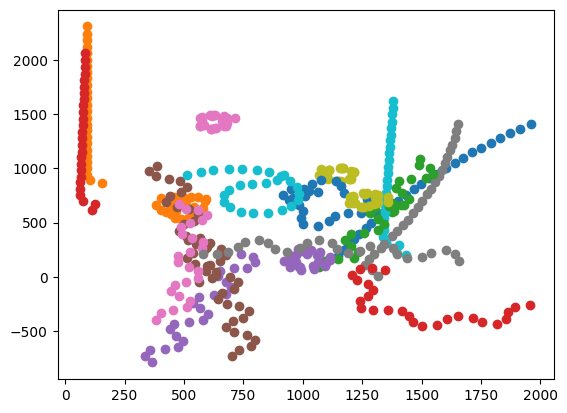

In [65]:
fig, ax = plt.subplots()

for pose_index in range(poses_over_time.shape[1]):
    ax.scatter(poses_over_time[:, pose_index, 0], poses_over_time[:, pose_index, 1])


Ok - so some are sensible looking paths, some are little rings. Almost like the radians/rotation is changing between poses. That makes no sense..

I think it's time to retransform them.

## Standard for transforming poses
Start with a set of poses.
Each call will take -> incoming poses, rot1, trans, rot2.
It will then return the next set of poses.

We can then put this in a graph to see how they develop over time.

In [74]:
def transform_poses(poses: np.array, rot1: float, trans: float, rot2: float) -> np.array:
    """Rot1 -> degrees,
    trans -> mm,
    rot2 -> degrees """
    new_poses = poses.copy()
    print(new_poses[0].shape)
    new_poses[:, 2] += rot1
    rotation_radians = np.radians(new_poses[:, 2])
    new_poses[:,0] += trans * np.cos(rotation_radians)
    new_poses[:,1] += trans * np.sin(rotation_radians)
    new_poses[:,2] += rot2
    return new_poses

print(poses_over_time.shape, new_data[0].shape)
new_poses = transform_poses(poses_over_time[0], new_data[0,5], new_data[0,6], new_data[0,7])

# I don't have the rotation data - only the x,y data. Let's dump more out.

(26, 20, 2) (8,)
(2,)


IndexError: index 2 is out of bounds for axis 1 with size 2

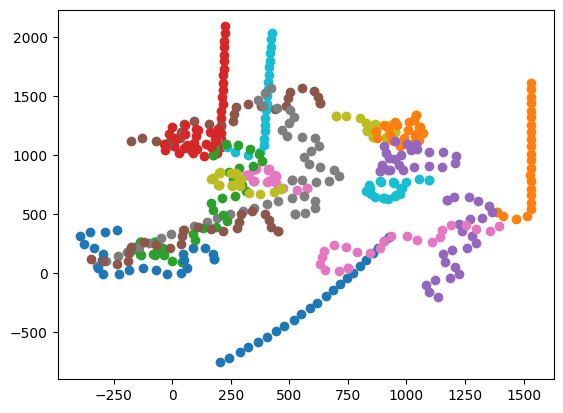

In [85]:

# each pose is a list of x,y,heading
# List of 20 poses, rot1, trans, rot2
data_with_headings = [
[[[925.478, 311.719, 208.524], [1385.53, 520.633, 305.534], [41.4205, 94.8741, 160.633], [9.37529, 1080.54, 218.524], [1171.47, 619.267, 41.4205], [629.408, 1446.96, 94.8741], [576.609, 719.446, 192.524], [524.91, 501.414, 9.37529], [698.915, 1331.59, 0.540527], [188.589, 1134.06, 309.524], [178.442, 120.2, 91.4702], [1039.41, 1341.0, 259.267], [174.547, 1006.62, 153.524], [193.563, 1226.19, 269.408], [885.456, 866.621, 6.95557], [451.586, 356.91, 184.524], [748.809, 48.4384, 216.609], [510.829, 789.432, 359.446], [465.07, 718.589, 131.524], [1095.43, 790.161, 164.91]], 0.262041, 0.593001, 0.262041],
[[[924.88, 311.124, 241.301], [1386.2, 520.113, 306.198], [40.5783, 94.9179, 160.113], [8.8905, 1079.85, 338.311], [1171.92, 619.98, 40.5783], [629.103, 1447.74, 94.9179], [575.871, 719.038, 193.41], [525.669, 501.78, 8.8905], [699.721, 1331.83, 359.851], [189.288, 1133.59, 251.301], [178.183, 121.003, 91.9194], [1039.49, 1340.16, 259.98], [173.717, 1006.76, 74.1978], [193.793, 1225.37, 269.103], [886.23, 866.955, 7.7417], [450.798, 356.609, 127.651], [748.302, 47.7649, 215.871], [511.641, 789.662, 359.038], [464.355, 719.037, 225.301], [1094.59, 790.142, 165.669]], 16.3886, 0.843376, 16.3886],
[[[905.23, 271.857, 245.529], [1413.42, 485.66, 333.419], [-1.23448, 108.321, 125.66], [50.2613, 1065.14, 310.426], [1204.19, 649.753, 358.766], [623.727, 1491.32, 108.321], [533.564, 707.286, 164.341], [568.771, 510.162, 50.2613], [743.604, 1333.34, 345.14], [176.755, 1091.51, 342.54], [175.095, 164.803, 124.192], [1033.45, 1296.67, 289.753], [184.107, 1049.43, 44.8065], [194.725, 1181.48, 263.727], [929.491, 874.471, 51.3198], [422.712, 390.36, 99.1461], [713.694, 20.7414, 173.564], [555.54, 790.545, 347.286], [434.643, 686.708, 197.638], [1051.67, 799.433, 208.771]], 2.11409, 43.9085, 2.11409],
[[[879.508, 216.401, 244.703], [1467.89, 457.912, 27.8911], [-36.5139, 158.246, 97.9125], [89.5671, 1018.32, 332.593], [1265.3, 647.995, 323.486], [604.93, 1549.49, 158.246], [474.822, 724.21, 124.834], [608.189, 556.887, 89.5671], [802.577, 1317.23, 298.32], [234.937, 1072.75, 309.6], [141.106, 215.615, 185.299], [1053.7, 1238.98, 287.995], [227.789, 1092.19, 357.939], [187.608, 1120.76, 244.93], [968.04, 921.916, 109.49], [413.431, 450.783, 107.495], [652.999, 28.0316, 114.822], [615.074, 776.661, 4.21045], [376.253, 668.605, 163.515], [997.876, 770.397, 248.189]], -0.413049, 61.1319, -0.413049],
[[[856.638, 168.865, 243.913], [1514.68, 482.267, 74.6831], [-43.415, 210.543, 122.267], [136.228, 993.715, 27.1005], [1307.48, 616.316, 316.585], [556.072, 1569.38, 210.543], [444.99, 767.716, 97.1219], [608.952, 609.633, 136.228], [827.28, 1270.63, 273.715], [268.28, 1031.87, 331.802], [88.5479, 211.105, 227.478], [1069.65, 1188.7, 256.316], [280.492, 1089.93, 322.695], [164.927, 1073.13, 196.072], [950.783, 971.765, 129.378], [397.92, 501.202, 157.455], [631.185, 76.0609, 84.9896], [667.708, 780.171, 47.7158], [325.775, 683.923, 124.043], [977.939, 721.559, 248.952]], -0.39528, 52.7508, -0.39528],
[[[828.255, 112.102, 242.953], [1531.96, 543.334, 91.9595], [-76.8456, 264.489, 183.334], [192.965, 1022.15, 73.7238], [1353.21, 572.314, 283.154], [501.145, 1537.59, 264.489], [437.649, 830.754, 121.307], [563.493, 653.919, 192.965], [830.862, 1207.26, 302.153], [323.959, 1001.42, 26.1412], [45.264, 164.691, 273.211], [1054.12, 1127.17, 212.314], [330.649, 1051.05, 315.626], [103.798, 1056.07, 141.145], [910.931, 1021.16, 97.5854], [339.512, 526.024, 209.584], [637.257, 139.234, 77.6488], [710.799, 826.764, 110.754], [290.688, 736.806, 96.1626], [954.65, 662.522, 203.493]], -0.479665, 63.4643, -0.479665],
[[[802.998, 63.5656, 242.065], [1530.51, 598.029, 90.5127], [-131.49, 261.73, 238.029], [208.706, 1074.55, 91.0712], [1365.25, 518.94, 228.51], [495.468, 1483.17, 261.73], [409.581, 877.72, 182.446], [510.08, 642.057, 208.706], [859.62, 1160.72, 354.554], [373.262, 1025.14, 72.8355], [47.9056, 110.041, 285.25], [1007.65, 1098.28, 158.94], [369.46, 1012.48, 282.266], [61.4574, 1090.73, 135.468], [904.129, 1075.45, 43.1665], [291.722, 499.382, 263.6], [649.374, 192.59, 49.5809], [691.808, 878.077, 157.72], [285.236, 791.248, 120.419], [904.304, 641.101, 150.08]], -0.444139, 54.7143, -0.444139],
[[[771.821, 6.01371, 241.044], [1530.51, 663.483, 90.5103], [-166.641, 206.515, 303.483], [208.066, 1140.0, 89.4912], [1321.45, 470.299, 193.359], [485.476, 1418.48, 206.515], [344.164, 875.51, 237.008], [452.393, 611.131, 208.066], [924.72, 1153.92, 60.0044], [393.136, 1087.51, 90.0497], [64.5585, 46.7407, 241.452], [946.781, 1122.34, 110.299], [382.795, 948.401, 227.488], [15.2086, 1137.05, 125.476], [952.266, 1119.8, 338.479], [283.847, 434.403, 260.708], [692.256, 242.041, 344.164], [631.464, 903.431, 155.51], [252.6, 847.985, 181.424], [847.866, 674.253, 92.3926]], -0.510755, 65.4542, -0.510755],
[[[745.731, -40.3032, 240.173], [1530.44, 716.643, 90.4409], [-137.651, 161.956, 356.643], [208.942, 1193.16, 89.6397], [1269.64, 458.41, 222.349], [437.73, 1395.11, 161.956], [314.88, 831.144, 302.613], [405.296, 586.478, 208.942], [951.645, 1199.76, 113.157], [393.494, 1140.66, 88.6207], [38.7997, 0.239159, 189.639], [928.718, 1172.34, 98.41], [346.577, 909.489, 192.489], [-15.3136, 1180.57, 77.7296], [1001.57, 1099.92, 315.11], [274.865, 382.008, 205.644], [743.286, 227.147, 314.88], [583.256, 925.834, 111.144], [199.449, 847.068, 236.137], [846.051, 727.381, 45.2959]], -0.435255, 53.1593, -0.435255],
[[[714.391, -93.8924, 239.187], [1530.5, 778.723, 90.4971], [-75.7103, 157.787, 58.7234], [209.866, 1255.23, 89.4549], [1223.4, 416.986, 284.29], [378.87, 1414.85, 157.787], [347.888, 778.566, 355.657], [350.712, 556.904, 209.866], [927.725, 1257.05, 175.23], [395.522, 1202.71, 88.6537], [-22.4916, -9.62879, 143.4], [920.167, 1233.83, 56.9858], [285.852, 896.586, 221.363], [-1.59844, 1241.12, 18.8698], [1045.17, 1055.73, 334.846], [218.671, 355.623, 160.97], [786.711, 182.782, 347.888], [561.361, 983.926, 58.5659], [164.415, 795.817, 301.627], [890.099, 771.127, 350.712]], -0.492992, 62.0807, -0.492992],
[[[685.801, -143.805, 241.203], [1528.99, 836.225, 88.9863], [-46.7166, 207.467, 116.225], [209.401, 1312.75, 92.5135], [1238.58, 361.503, 313.283], [325.243, 1435.65, 207.467], [405.311, 775.219, 60.7398], [301.342, 527.386, 209.401], [870.327, 1260.82, 232.75], [395.861, 1260.23, 91.4713], [-69.2668, 23.849, 158.576], [950.654, 1282.61, 1.50281], [243.356, 857.821, 286.306], [52.4955, 1260.67, 325.243], [1097.66, 1032.2, 355.651], [163.972, 373.419, 159.804], [843.155, 171.703, 45.3113], [590.491, 1033.53, 55.2195], [195.435, 747.377, 357.673], [947.021, 762.844, 301.342]], 1.00819, 57.5211, 1.00819],
[[[655.222, -195.074, 237.171], [1532.14, 895.837, 92.1416], [-71.195, 261.913, 175.837], [208.883, 1372.44, 84.9536], [1277.95, 316.633, 288.805], [271.341, 1410.0, 261.913], [436.303, 826.239, 112.192], [248.336, 499.928, 208.883], [832.544, 1214.6, 292.443], [396.429, 1319.92, 88.4807], [-124.036, 47.5953, 197.949], [1010.35, 1282.07, 316.633], [258.09, 799.972, 309.25], [100.312, 1224.94, 271.341], [1156.99, 1025.58, 329.998], [108.706, 395.986, 203.434], [886.603, 212.64, 76.3033], [626.248, 1081.33, 106.239], [254.959, 742.856, 56.707], [976.258, 710.798, 248.336]], -2.01638, 59.6955, -2.01638],
[[[620.105, -248.49, 236.185], [1530.3, 959.736, 90.3027], [-134.91, 267.102, 239.736], [215.054, 1436.07, 91.1556], [1298.03, 255.945, 225.09], [261.803, 1346.79, 267.102], [412.668, 885.635, 174.851], [192.099, 469.533, 215.054], [856.439, 1155.31, 356.07], [398.674, 1383.81, 83.9676], [-185.018, 28.4192, 218.034], [1056.44, 1237.78, 255.945], [298.109, 750.123, 287.819], [101.258, 1161.02, 261.803], [1212.07, 993.143, 266.788], [49.837, 371.069, 260.927], [902.274, 274.615, 52.6683], [608.9, 1142.85, 165.635], [290.508, 795.986, 111.206], [952.149, 651.593, 192.099]], -0.49299, 63.9255, -0.49299],
[[[589.045, -294.045, 235.243], [1530.46, 1014.87, 90.4644], [-163.088, 219.711, 294.871], [214.395, 1491.2, 89.3611], [1258.79, 217.217, 196.912], [258.564, 1291.75, 219.711], [357.797, 891.035, 238.794], [146.706, 438.238, 214.395], [911.413, 1151.08, 51.2021], [404.918, 1438.59, 90.214], [-228.723, -5.19387, 178.789], [1042.61, 1184.4, 217.217], [314.549, 697.495, 224.149], [92.9489, 1106.51, 258.564], [1208.53, 938.121, 211.747], [40.6953, 316.696, 266.161], [936.069, 318.179, 357.797], [555.602, 1156.97, 171.035], [270.987, 847.55, 173.909], [898.144, 640.48, 146.706]], -0.470786, 55.136, -0.470786],
[[[550.998, -347.757, 234.133], [1530.57, 1080.69, 90.5688], [-135.984, 159.727, 0.694336], [215.767, 1557.01, 89.354], [1195.63, 198.68, 224.016], [207.522, 1250.18, 159.727], [323.149, 835.069, 293.761], [92.0332, 401.583, 215.767], [953.151, 1201.98, 117.011], [405.31, 1504.41, 88.2508], [-294.515, -3.16525, 115.63], [989.809, 1145.1, 198.68], [266.877, 652.108, 195.802], [79.273, 1042.13, 207.522], [1152.22, 904.031, 170.185], [35.6515, 251.067, 218.6], [1001.82, 315.012, 323.149], [490.685, 1167.86, 115.069], [205.606, 855.169, 237.684], [843.478, 677.145, 92.0332]], -0.555168, 65.8231, -0.555168],
[[[518.28, -392.235, 233.191], [1530.47, 1135.91, 90.4741], [-80.7692, 159.942, 55.9092], [216.843, 1612.22, 89.6273], [1155.61, 160.641, 279.231], [155.886, 1269.74, 159.942], [344.981, 784.353, 359.753], [46.9679, 369.679, 216.843], [928.479, 1251.37, 172.215], [407.449, 1559.59, 88.4124], [-317.989, 46.8114, 75.6089], [937.359, 1127.85, 160.641], [213.627, 637.509, 223.075], [30.0985, 1017.02, 155.886], [1097.9, 913.891, 189.741], [-7.7815, 216.975, 158.785], [1045.73, 281.536, 344.981], [467.702, 1218.06, 64.353], [175.706, 808.75, 292.819], [841.972, 732.339, 46.9679]], -0.470786, 55.215, -0.470786],
[[[478.294, -444.653, 232.134], [1530.54, 1201.84, 90.5371], [-43.3137, 214.198, 121.838], [217.88, 1678.14, 89.4171], [1165.58, 95.4714, 316.686], [94.1679, 1292.92, 214.198], [410.903, 783.46, 54.8521], [-6.15586, 330.635, 217.88], [863.244, 1260.91, 238.136], [409.884, 1625.47, 88.5702], [-301.014, 110.517, 85.584], [875.362, 1150.27, 95.4714], [165.055, 592.929, 278.174], [-29.826, 1044.5, 94.1679], [1032.82, 903.335, 212.923], [-69.0195, 241.398, 158.885], [1109.24, 263.865, 50.9033], [496.784, 1277.23, 63.4602], [200.713, 747.748, 358.696], [887.405, 780.114, 353.844]], -0.528523, 65.9286, -0.528523],
[[[443.998, -488.043, 231.219], [1530.46, 1257.15, 90.46], [-72.1133, 261.415, 177.145], [218.884, 1733.43, 89.6222], [1205.52, 57.2109, 287.887], [48.1764, 1262.2, 261.415], [443.103, 828.428, 120.923], [-50.0795, 297.026, 218.884], [833.672, 1214.17, 293.434], [411.705, 1680.75, 88.5021], [-296.316, 165.625, 125.522], [870.529, 1205.37, 57.2109], [172.481, 538.123, 315.771], [-33.4051, 1099.7, 48.1764], [986.154, 873.647, 182.203], [-120.453, 261.733, 213.283], [1144.46, 306.508, 83.1032], [521.891, 1326.51, 108.428], [255.995, 746.048, 53.9372], [942.344, 773.744, 309.92]], -0.457461, 55.3073, -0.457461],
[[[403.288, -537.756, 230.153], [1530.54, 1321.4, 90.542], [-136.256, 265.213, 241.4], [219.906, 1797.68, 89.394], [1224.69, -4.11922, 223.744], [37.9944, 1198.76, 265.213], [410.598, 883.854, 176.079], [-100.47, 257.156, 219.906], [858.677, 1154.98, 357.681], [413.982, 1744.96, 88.5562], [-333.161, 218.266, 144.687], [905.827, 1259.06, 355.881], [218.105, 492.877, 286.821], [9.88617, 1147.18, 37.9944], [921.926, 871.774, 118.76], [-174.494, 226.972, 260.349], [1152.77, 370.223, 50.5977], [502.147, 1387.66, 163.854], [294.301, 797.636, 119.857], [983.118, 724.083, 259.53]], -0.532964, 64.2549, -0.532964],
[[[367.49, -579.967, 229.247], [1530.46, 1376.75, 90.4561], [-163.133, 216.83, 296.747], [220.929, 1853.02, 89.636], [1184.4, -42.0708, 196.867], [32.9392, 1143.64, 216.83], [355.412, 888.075, 240.494], [-143.206, 221.987, 220.929], [913.959, 1152.3, 53.0181], [415.814, 1800.28, 88.488], [-378.07, 250.615, 104.401], [960.997, 1254.65, 317.929], [233.702, 439.773, 222.838], [53.7714, 1180.9, 32.9392], [895.68, 920.503, 63.6445], [-184.203, 172.484, 264.306], [1188.24, 412.711, 355.412], [449.107, 1403.47, 168.075], [267.128, 845.853, 175.173], [972.631, 669.739, 216.794]], -0.45302, 55.3468, -0.45302],
[[[325.086, -628.297, 228.226], [1530.52, 1441.04, 90.5176], [-134.711, 159.159, 1.0415], [221.91, 1917.31, 89.4345], [1122.71, -60.1763, 225.289], [-18.8647, 1105.56, 159.159], [323.248, 832.404, 295.725], [-192.155, 180.301, 221.91], [953.092, 1203.31, 117.305], [418.083, 1864.53, 88.6144], [-393.505, 313.029, 42.709], [1008.34, 1211.14, 299.824], [186.168, 396.48, 195.845], [108.04, 1215.38, 341.135], [924.736, 977.857, 25.564], [-191.152, 108.566, 215.809], [1252.28, 406.997, 323.248], [386.321, 1417.31, 112.404], [203.112, 851.834, 239.472], [920.803, 631.691, 167.845]], -0.510755, 64.2945, -0.510755],
[[[287.859, -669.288, 227.284], [1530.47, 1496.41, 90.4722], [-79.3405, 159.711, 56.4146], [222.912, 1972.67, 89.576], [1083.43, -99.2067, 280.659], [-70.4512, 1125.69, 159.711], [346.873, 782.323, 0.0999372], [-233.666, 143.654, 222.912], [928.096, 1252.73, 172.669], [419.877, 1919.88, 88.493], [-352.509, 350.252, 3.43018], [1035.48, 1162.88, 260.793], [132.776, 381.799, 224.348], [160.29, 1197.05, 289.549], [974.883, 1001.34, 45.689], [-236.323, 76.5384, 158.217], [1296.37, 373.502, 346.873], [365.638, 1468.68, 62.3232], [174.594, 804.369, 294.783], [866.769, 643.795, 126.334]], -0.470783, 55.3731, -0.470783],
[[[243.792, -716.142, 226.227], [1530.54, 1560.74, 90.5357], [-43.2668, 212.963, 120.735], [223.981, 2036.98, 89.4151], [1094.74, -162.525, 316.733], [-130.573, 1148.55, 212.963], [411.192, 781.842, 55.3575], [-281.177, 100.296, 223.981], [864.379, 1261.52, 236.981], [422.162, 1984.16, 88.5189], [-288.271, 353.508, 14.7441], [1024.61, 1099.49, 197.475], [86.3671, 337.264, 279.602], [181.252, 1136.24, 229.427], [1020.24, 1046.95, 68.5483], [-295.828, 100.957, 158.654], [1358.88, 358.316, 51.1916], [396.038, 1525.36, 61.842], [201.017, 745.726, 359.043], [829.139, 695.959, 78.8229]], -0.528523, 64.3209, -0.528523],
[[[205.157, -755.846, 225.339], [1530.45, 1616.13, 90.4468], [-71.21, 260.799, 176.135], [224.976, 2092.37, 89.6474], [1134.79, -200.807, 288.79], [-177.286, 1118.77, 260.799], [443.036, 827.175, 119.847], [-321.338, 62.1359, 224.976], [833.832, 1215.3, 292.371], [424.023, 2039.53, 88.5268], [-234.588, 367.192, 54.7886], [971.635, 1083.26, 159.193], [95.1845, 282.571, 315.845], [144.894, 1094.44, 182.714], [1040.9, 1098.35, 38.7666], [-347.269, 121.522, 212.075], [1393.93, 401.215, 83.0361], [422.559, 1574.0, 107.175], [256.4, 744.371, 54.4692], [840.299, 750.223, 38.662]], -0.444136, 55.3995, -0.444136],
]

heading_poses_over_time = np.array([
    item[0] for item in data_with_headings
])
motion_over_time = np.array([
    item[1:] for item in data_with_headings
])

heading_poses_over_time
fig, ax = plt.subplots()
for pose_index in range(heading_poses_over_time.shape[1]):
    ax.scatter(heading_poses_over_time[:, pose_index, 0], heading_poses_over_time[:, pose_index, 1])


In [92]:
def transform_poses(poses: np.array, rot1: float, trans: float, rot2: float) -> np.array:
    """Rot1 -> degrees,
    trans -> mm,
    rot2 -> degrees """
    new_poses = poses.copy()
    print(new_poses[0].shape)
    new_poses[:,2] += rot1
    rotation_radians = np.radians(new_poses[:, 2])
    new_poses[:,0] += trans * np.cos(rotation_radians)
    new_poses[:,1] += trans * np.sin(rotation_radians)
    new_poses[:,2] += rot2
    return new_poses

print("Poses over time", heading_poses_over_time.shape, motion_over_time[0].shape)
new_poses = transform_poses(heading_poses_over_time[0], motion_over_time[0,0], motion_over_time[0,1], motion_over_time[0,2])
print("Original pose:", heading_poses_over_time[0,0], "-> calculated:", new_poses[0], "on robot:", heading_poses_over_time[1, 0])
print(motion_over_time[0,0], motion_over_time[0,1], motion_over_time[0,2])

Poses over time (24, 20, 3) (3,)
(3,)
Original pose: [925.478 311.719 208.524] -> calculated: [924.95827968 311.4334462  209.048082  ] on robot: [924.88  311.124 241.301]
0.262041 0.593001 0.262041


The robot one and the code one I here look nothing alike. Is it the constraint? Try adding it.

In [94]:

constrain_360 = np.vectorize(lambda n: float(n % 360))
def constrain_transform_poses(poses: np.array, rot1: float, trans: float, rot2: float) -> np.array:
    """Rot1 -> degrees,
    trans -> mm,
    rot2 -> degrees """
    new_poses = poses.copy()
    print(new_poses[0].shape)
    new_poses[:,2] += rot1
    rotation_radians = np.radians(new_poses[:, 2])
    new_poses[:,0] += trans * np.cos(rotation_radians)
    new_poses[:,1] += trans * np.sin(rotation_radians)
    new_poses[:,2] += rot2
    new_poses[:,2] = constrain_360(new_poses[:,2])
    return new_poses

print("Poses over time", heading_poses_over_time.shape, motion_over_time[0].shape)
new_poses = constrain_transform_poses(heading_poses_over_time[0], motion_over_time[0,0], motion_over_time[0,1], motion_over_time[0,2])
print("Original pose:", heading_poses_over_time[0,0], "-> calculated:", new_poses[0], "on robot:", heading_poses_over_time[1, 0])
print(motion_over_time[0,0], motion_over_time[0,1], motion_over_time[0,2])

Poses over time (24, 20, 3) (3,)
(3,)
Original pose: [925.478 311.719 208.524] -> calculated: [924.95827968 311.4334462  209.048082  ] on robot: [924.88  311.124 241.301]
0.262041 0.593001 0.262041


Not the constraint. How else is my scenario different?
- We are making a copy, but that should not matter.
- Is the += operator on a list the same on the robot?

From the robot:
```python
>>> d = np.arange(20, dtype=np.float)
>>> d
array([0.0, 1.0, 2.0, ..., 17.0, 18.0, 19.0], dtype=float32)
>>> d += 0.13
>>> d
array([0.13, 1.13, 2.13, ..., 17.13, 18.13, 19.13], dtype=float32)
```

Ok - I tried a bit of code on the robot  - and got the 209 (not 241) heading. Whaaaaa?

Simply put, the heading diffs between pose row 0 and 1 should be the same as the motion row 0 heading delta.

In [97]:
# heading_diffs
heading_poses_over_time[1, :, 2] - heading_poses_over_time[0, :, 2]

array([ 3.27770000e+01,  6.64000000e-01, -5.20000000e-01,  1.19787000e+02,
       -8.42200000e-01,  4.38000000e-02,  8.86000000e-01, -4.84790000e-01,
        3.59310473e+02, -5.82230000e+01,  4.49200000e-01,  7.13000000e-01,
       -7.93262000e+01, -3.05000000e-01,  7.86130000e-01, -5.68730000e+01,
       -7.38000000e-01, -4.08000000e-01,  9.37770000e+01,  7.59000000e-01])

And they are so clearly not. What is going on?
rot1 or 2 are not lists? we dumped them above - clearly not.


Okay - reran code on my bot - based on the motion model - and it's doing the correct thing. What else is wrong there? This works correctly on the robot.
```python
def constrain_transform_poses(poses: np.array, rot1: float, trans: float, rot2: float) -> np.array:
    """Rot1 -> degrees,
    trans -> mm,
    rot2 -> degrees """
    new_poses = poses.copy()
    print(new_poses[0].shape)
    new_poses[:,2] += rot1
    rotation_radians = np.radians(new_poses[:, 2])
    new_poses[:,0] += trans * np.cos(rotation_radians)
    new_poses[:,1] += trans * np.sin(rotation_radians)
    new_poses[:,2] += rot2
    new_poses[:,2] = constrain_360(new_poses[:,2])
    return new_poses
```
- Try making it async...
    - With it awaiting and returning a result - same thing.
- Try setting the original poses - no copy. - same result.
- try putting in a class and put the poses as a class member - which is now mutated instead of returned. - still the same.
- Its not the ulab.numpy.array.tolist.

Oh fgs - I'm looking at the poses POST transform - not pre - aaaarrrg! Lets confirm that.

In [100]:
heading_poses_over_time[1, :, 2] - heading_poses_over_time[0, :, 2]

array([ 3.27770000e+01,  6.64000000e-01, -5.20000000e-01,  1.19787000e+02,
       -8.42200000e-01,  4.38000000e-02,  8.86000000e-01, -4.84790000e-01,
        3.59310473e+02, -5.82230000e+01,  4.49200000e-01,  7.13000000e-01,
       -7.93262000e+01, -3.05000000e-01,  7.86130000e-01, -5.68730000e+01,
       -7.38000000e-01, -4.08000000e-01,  9.37770000e+01,  7.59000000e-01])

In [102]:
motion_over_time[1, 2]

16.3886

Wait - so it's still not this value... What are we now getting on the robot simplified poses code? Lets' put in motion item 1.
- I get the exact same result on the robot. And do I get that here?

In [110]:
def transform_poses(poses: np.array, rot1: float, trans: float, rot2: float) -> np.array:
    """Rot1 -> degrees,
    trans -> mm,
    rot2 -> degrees """
    new_poses = poses.copy()
    print(new_poses[0].shape)
    new_poses[:,2] += rot1
    rotation_radians = np.radians(new_poses[:, 2])
    new_poses[:,0] += trans * np.cos(rotation_radians)
    new_poses[:,1] += trans * np.sin(rotation_radians)
    new_poses[:,2] += rot2
    return new_poses

new_poses = transform_poses(heading_poses_over_time[0], motion_over_time[1,0], motion_over_time[1,1], motion_over_time[1,2])
print("Transform:", motion_over_time[1,0], motion_over_time[1,1], motion_over_time[1,2])
print("Original pose:", heading_poses_over_time[0,0], "-> calculated:", new_poses[0], "on robot:", heading_poses_over_time[1, 0])
print("Original pose:", heading_poses_over_time[0,1], "-> calculated:", new_poses[1], "on robot:", heading_poses_over_time[1, 1])
print("Original pose:", heading_poses_over_time[0,2], "-> calculated:", new_poses[2], "on robot:", heading_poses_over_time[1, 2])

(3,)
Transform: 16.3886 0.843376 16.3886
Original pose: [925.478 311.719 208.524] -> calculated: [924.88073411 311.1235535  241.3012    ] on robot: [924.88  311.124 241.301]
Original pose: [1385.53   520.633  305.534] -> calculated: [1386.19388733  520.11286858  338.3112    ] on robot: [1386.2    520.113  306.198]
Original pose: [ 41.4205  94.8741 160.633 ] -> calculated: [ 40.57826324  94.91792138 193.4102    ] on robot: [ 40.5783  94.9179 160.113 ]


Ok - this works here, but not on the robot (example code, what about test code). What is going on?

In [107]:
241.3012 - 208.524

32.77719999999999

In [109]:
338.3112 - 305.534

32.77719999999999

Going back to simplified code on the robot, not using the constraint 360, or classes. And it behaves as above - we get 338.3112, not 306.198.
- Add the constrain in - and it goes wrong again! Same here?

In [112]:
constrain_360 = np.vectorize(lambda n: float(n % 360))
def transform_poses111(poses: np.array, rot1: float, trans: float, rot2: float) -> np.array:
    """Rot1 -> degrees,
    trans -> mm,
    rot2 -> degrees """
    new_poses = poses.copy()
    print(new_poses[0].shape)
    new_poses[:,2] += rot1
    rotation_radians = np.radians(new_poses[:, 2])
    new_poses[:,0] += trans * np.cos(rotation_radians)
    new_poses[:,1] += trans * np.sin(rotation_radians)
    new_poses[:,2] += rot2
    new_poses[:,2] = constrain_360(new_poses[:,2])
    return new_poses

new_poses = transform_poses111(heading_poses_over_time[0], motion_over_time[1,0], motion_over_time[1,1], motion_over_time[1,2])
print("Transform:", motion_over_time[1,0], motion_over_time[1,1], motion_over_time[1,2])
print("Original pose:", heading_poses_over_time[0,0], "-> calculated:", new_poses[0], "on robot:", heading_poses_over_time[1, 0])
print("Original pose:", heading_poses_over_time[0,1], "-> calculated:", new_poses[1], "on robot:", heading_poses_over_time[1, 1])
print("Original pose:", heading_poses_over_time[0,2], "-> calculated:", new_poses[2], "on robot:", heading_poses_over_time[1, 2])

(3,)
Transform: 16.3886 0.843376 16.3886
Original pose: [925.478 311.719 208.524] -> calculated: [924.88073411 311.1235535  241.3012    ] on robot: [924.88  311.124 241.301]
Original pose: [1385.53   520.633  305.534] -> calculated: [1386.19388733  520.11286858  338.3112    ] on robot: [1386.2    520.113  306.198]
Original pose: [ 41.4205  94.8741 160.633 ] -> calculated: [ 40.57826324  94.91792138 193.4102    ] on robot: [ 40.5783  94.9179 160.113 ]


Almost like vectorize doesn't work on the robot?
- Add a dumb constrain without vectorize:
```python
def dumb_constrain_360(items):
    return np.array([float(item % 360) for item in items])
```
That works.

Ok - trying plain vectorize test in CircuitPython:
```python
from ulab import numpy as np
headings = np.array([
    241.301,
    338.311,
    193.41,
    51.301,
    4.1977,
    127.651,
    225.301,
    42.1525,
    33.3177,
    342.301,
    124.247,
    292.044,
    186.301,
    302.185,
    9.7328,
    217.301,
    249.386,
    2.2231,
    164.301,
    197.687
])

constrain_360 = np.vectorize(lambda n: float(n % 360))
print(repr(constrain_360(headings).tolist()))
```
That works.
- Maybe the combo of vectorise and a numpy list slice?
`output = constrain_360(new_poses[:,2])` - yes - that does it.
- Just printing the slice, gives the right result. Is this something todo with being a numpy array?
    - What about storing the result in an intermediate? - doesn't help

If vectorise is making strange behaviour, and if according to numpy doc it's not for performance (only convenience), then my code is simpler, book easier to explain and no slower by using a list comprehension. Let's do that.


In [ ]:
241.301,
338.311,
193.41,
51.301,
4.1977,
127.651,
225.301,
42.1525,
33.3177,
342.301,
124.247,
292.044,
186.301,
302.185,
9.7328,
217.301,
249.386,
2.2231,
164.301,
197.687

In [113]:
import numpy as np

new_poses = np.array([
   [924.881, 311.124, 241.301],
   [1386.19, 520.113, 338.311],
   [40.5783, 94.9179, 193.41],
   [8.8905, 1079.85, 251.301],
   [1171.92, 619.98, 74.1977],
   [629.102, 1447.75, 127.651],
   [575.871, 719.038, 225.301],
   [525.669, 501.781, 42.1525],
   [699.721, 1331.84, 33.3177],
   [189.287, 1133.59, 342.301],
   [178.183, 121.003, 124.247],
   [1039.49, 1340.16, 292.044],
   [173.717, 1006.77, 186.301],
   [193.793, 1225.38, 302.185],
   [886.23, 866.955, 39.7328],
   [450.798, 356.609, 217.301],
   [748.301, 47.7649, 249.386],
   [511.64, 789.662, 32.2231],
   [464.355, 719.037, 164.301],
   [1094.59, 790.142, 197.687]
], dtype=np.float)

constrain_360 = np.vectorize(lambda n: n % 360)
intermediate = new_poses[:,2]
output = constrain_360(intermediate)
output2 = np.array([n % 360 for n in intermediate])
print("With vectorise:", repr(output.tolist()))
print("With list comprehension:", repr(output2.tolist()))


With vectorise: [241.301, 338.311, 193.41, 251.301, 74.1977, 127.651, 225.301, 42.1525, 33.3177, 342.301, 124.247, 292.044, 186.301, 302.185, 39.7328, 217.301, 249.386, 32.2231, 164.301, 197.687]
With list comprehension: [241.301, 338.311, 193.41, 251.301, 74.1977, 127.651, 225.301, 42.1525, 33.3177, 342.301, 124.247, 292.044, 186.301, 302.185, 39.7328, 217.301, 249.386, 32.2231, 164.301, 197.687]


/var/folders/87/nv1zkt0s2nq86764_c0jf94h0000gn/T/ipykernel_98694/638229896.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)
